# "Predicting Airline Passenger Satisfaction: An Analysis using Linear, Polynomial, Logistic Regression and K-Nearest Neighbors

**Objective:**

This notebook aims to understand the factors influencing airline passenger satisfaction and predict satisfaction levels based on various features. 4 predictive models, Linear, Polynomial, Logistic Regression and K-Nearest Neighbors (KNN), are used to achieve this. A comparative analysis of their performance, interpretability, and importance of features is presented."

## Intoduction
### Context
This dataset contains an airline passenger satisfaction survey.

### Columns Description
Gender: Gender of the passengers (Female, Male)

Customer Type: The customer type (Loyal customer, disloyal customer)

Age: The actual age of the passengers

Type of Travel: Purpose of the flight of the passengers (Personal Travel, Business Travel)

Class: Travel class in the plane of the passengers (Business, Eco, Eco Plus)

Flight distance: The flight distance of this journey

Inflight wifi service: Satisfaction level of the inflight wifi service (0:Not Applicable;1-5)

Departure/Arrival time convenient: Satisfaction level of Departure/Arrival time convenient

Ease of Online booking: Satisfaction level of online booking

Gate location: Satisfaction level of Gate location

Food and drink: Satisfaction level of Food and drink

Online boarding: Satisfaction level of online boarding

Seat comfort: Satisfaction level of Seat comfort

Inflight entertainment: Satisfaction level of inflight entertainment

On-board service: Satisfaction level of On-board service

Leg room service: Satisfaction level of Leg room service

Baggage handling: Satisfaction level of baggage handling

Check-in service: Satisfaction level of Check-in service

Inflight service: Satisfaction level of inflight service

Cleanliness: Satisfaction level of Cleanliness

Departure Delay in Minutes: Minutes delayed when departure

Arrival Delay in Minutes: Minutes delayed when Arrival

Satisfaction: Airline satisfaction level(Satisfaction, neutral or dissatisfaction)

### General Analysis
What is the overall distribution of satisfaction levels among passengers?
How do different factors such as gender, age, customer type, and travel class correlate with satisfaction?
### Demographic Insights
How does gender influence satisfaction levels? Are there significant differences between male and female passengers?
What is the relationship between age and satisfaction? Are certain age groups more likely to be satisfied or dissatisfied?
How do loyal and disloyal customers differ in their satisfaction levels?
### Travel Characteristics
How does the type of travel (personal vs. business) impact satisfaction?
What is the correlation between travel class (Business, Eco, Eco Plus) and satisfaction levels?
Is there a relationship between flight distance and satisfaction? How do short and long flights compare?
### Service Quality Analysis
How do various service aspects (e.g., inflight wifi, seat comfort, food and drink) contribute to overall satisfaction?
Which service factors have the highest and lowest satisfaction levels? Where should improvements be focused?
Is there a correlation between delays (departure and arrival) and satisfaction levels?
### Predictive Modeling
Can we build a predictive model to forecast passenger satisfaction based on the given features? What would be the most significant predictors?
### TQM and Continuous Improvement
How can Total Quality Management (TQM) principles be applied to enhance service quality and satisfaction?
What are the potential incremental gains in satisfaction through continuous improvement in service aspects?
How can cross-functional collaboration be leveraged to create a holistic improvement strategy?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Importing the dataset
df = pd.read_csv('Airline Passenger Satisfaction.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [2]:
# Check 'id' column duplicates
df['id'].duplicated().mean()

0.0

In [3]:
# Drop 'Unnamed: 0' and 'id' Columns
df.drop(['Unnamed: 0', 'id'], axis=1, inplace=True)

In [4]:
# Checking for missing values
df.isnull().mean() * 100

Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

In [5]:
# Imputing missing values in "Arrival Delay in Minutes" with the median value
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [6]:
# Check for duplicates
df.duplicated().mean()

0.0

In [7]:
# Describing the dataset
df.describe()

,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.133392
std,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Feature Engineering

In [8]:
# Create feature for all service features
service_features = ['Inflight wifi service', 'Departure/Arrival time convenient',
    'Ease of Online booking', 'Gate location', 'Food and drink',
    'Online boarding', 'Seat comfort', 'Inflight entertainment',
    'On-board service', 'Leg room service', 'Baggage handling',
    'Checkin service', 'Inflight service', 'Cleanliness'
]

# Create the "Total Service Score" feature by averaging the values of the listed service features
df['Total_Service_Score'] = df[service_features].mean(axis=1)

# Display the "Total Service Score" feature first few rows to verify
df[['Total_Service_Score']].head()

,Total_Service_Score
0,3.857143
1,2.285714
2,3.714286
3,3.000000
4,3.500000


##### **Total Service Score:**

This feature represents the overall quality of service provided during the flight.

##### **Mechanism**:
The idea here is to create a composite score (Total_Service_Score) that provides a single value representing the overall service experience for each passenger. This is achieved by taking the average of all the individual service ratings provided by the passenger.

For example, if a passenger rated the "Inflight wifi service" as 4, "Ease of Online booking" as 5, "Gate location" as 3, and so on, the Total_Service_Score for that passenger would be the average of all these ratings.

This composite score serves as a consolidated metric that captures the essence of a passenger's overall experience with the airline's services. By analyzing and working with this score, we can draw more general insights about the relationship between service quality and passenger satisfaction, rather than diving into each service feature individually.

In essence, it provides a holistic view of the passenger's service experience, making it easier to identify patterns, trends, and areas for improvement.

In [9]:
# Create feature scaling for Customer Type
df['Customer Type'] = df['Customer Type'].map({'Loyal Customer': 0, 'disloyal Customer': 1})

In [10]:
# Encoding the satisfaction column as a binary variable
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103904 non-null  object 
 1   Customer Type                      103904 non-null  int64  
 2   Age                                103904 non-null  int64  
 3   Type of Travel                     103904 non-null  object 
 4   Class                              103904 non-null  object 
 5   Flight Distance                    103904 non-null  int64  
 6   Inflight wifi service              103904 non-null  int64  
 7   Departure/Arrival time convenient  103904 non-null  int64  
 8   Ease of Online booking             103904 non-null  int64  
 9   Gate location                      103904 non-null  int64  
 10  Food and drink                     103904 non-null  int64  
 11  Online boarding                    1039

In [12]:
# Save the cleaned dataset to a csv file
df.to_csv('Cleaned_Airline_Passenger_Satisfaction.csv', index=False)
df = pd.read_csv('Cleaned_Airline_Passenger_Satisfaction.csv')
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_Service_Score
0,Male,0,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,0,3.857143
1,Male,1,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,0,2.285714
2,Female,0,26,Business travel,Business,1142,2,2,2,2,...,4,3,4,4,4,5,0,0.0,1,3.714286
3,Female,0,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,0,3.000000
4,Male,0,61,Business travel,Business,214,3,3,3,3,...,3,4,4,3,3,3,0,0.0,1,3.500000


# EDA and Insights

C:\Users\moham\AppData\Local\Temp\ipykernel_12600\338945963.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


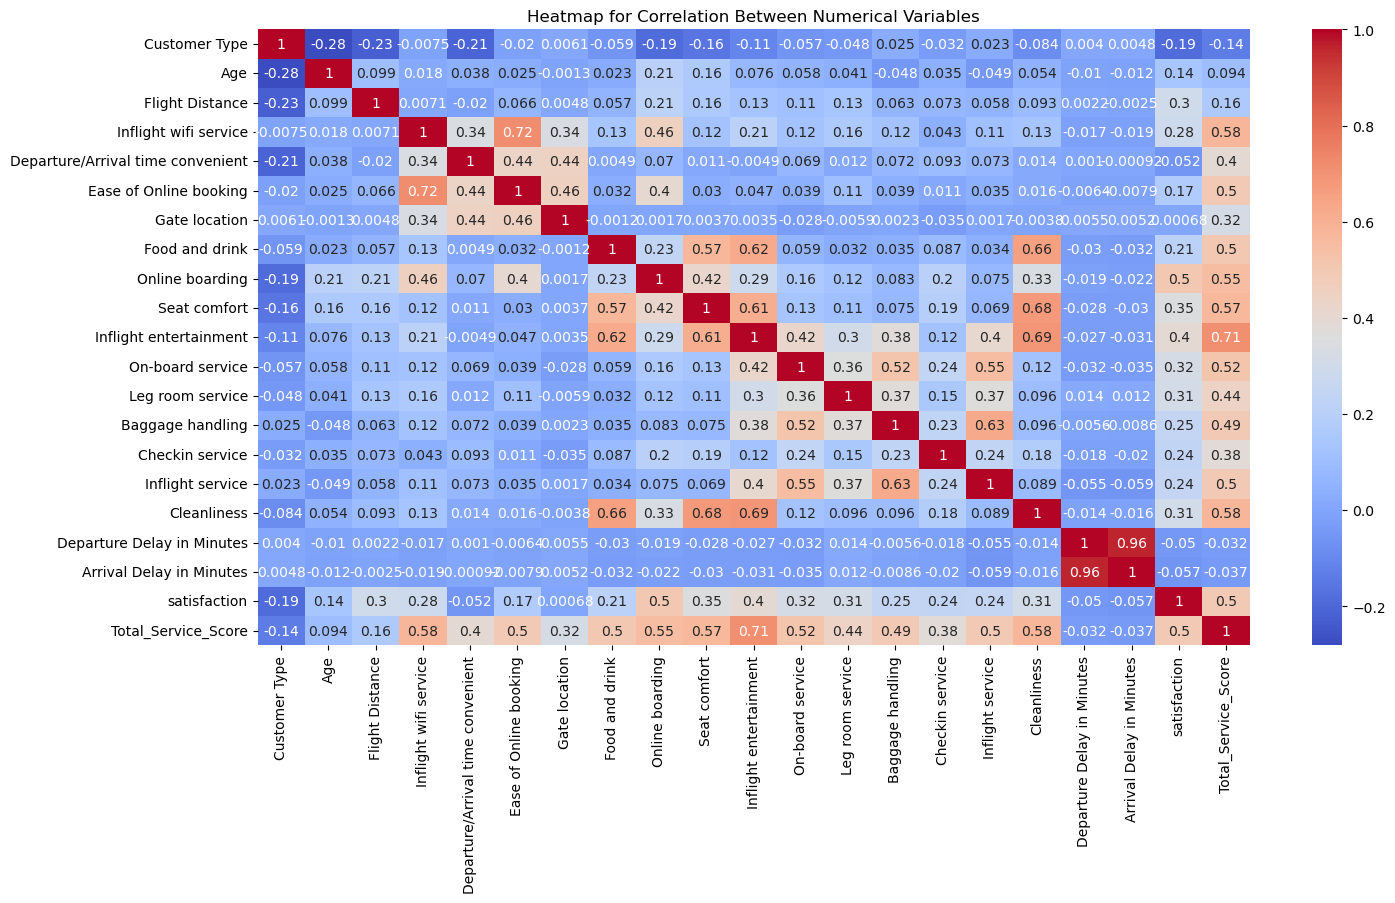

In [13]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

# Heatmap for correlation
plt.figure(figsize=(16, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Correlation Between Numerical Variables')
plt.show()

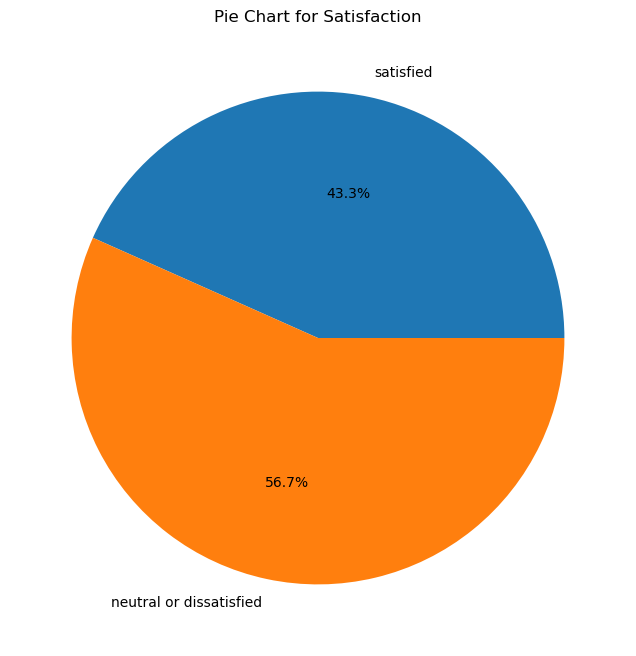

In [14]:
# Pie chart for "Satisfaction"
plt.figure(figsize=(8, 8))
labels = ['satisfied', 'neutral or dissatisfied']
sizes = [df['satisfaction'].value_counts()[1], df['satisfaction'].value_counts()[0]]
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Pie Chart for Satisfaction')
plt.show()

##### The pie chart above illustrates the distribution of satisfaction levels in the dataset:

##### Dissatisfied: 56.7% of the passengers were dissatisfied.
##### Satisfied: 43.3% of the passengers were satisfied.
##### This distribution reveals that more than half of the passengers were not satisfied with the service, highlighting potential areas for improvement.

##### ----------------------------------------------------------------------------------------------------------------------------------------

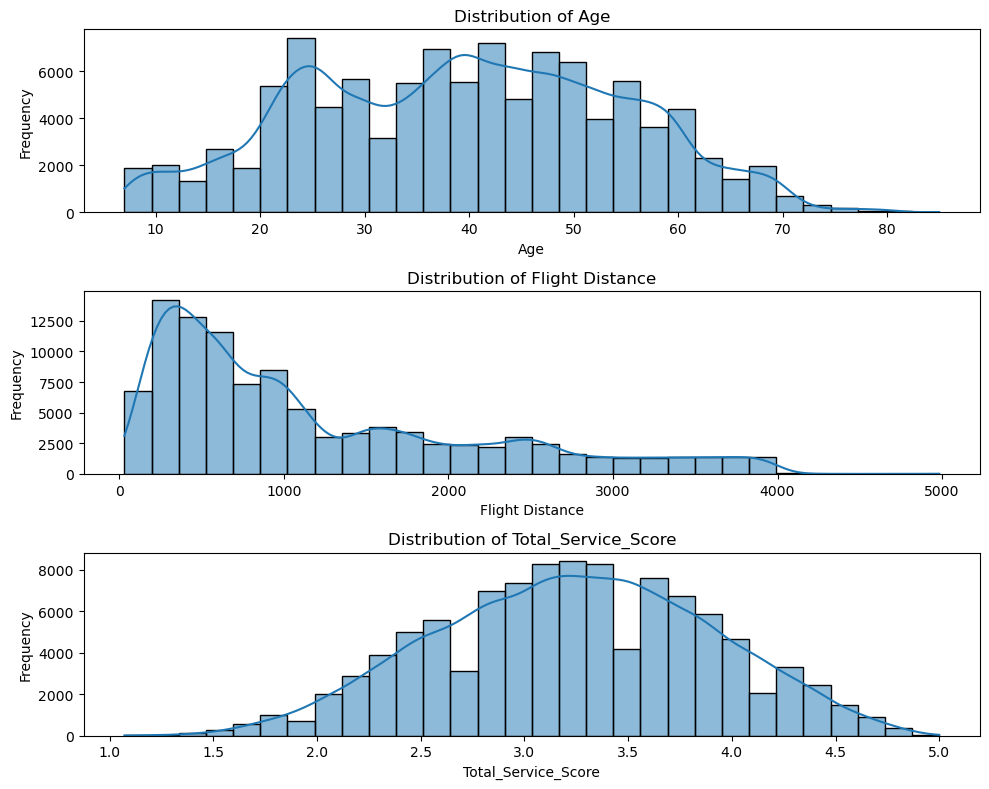

In [15]:
# Plotting the distribution for "Age" and "Flight Distance" features
features_to_plot = ['Age', 'Flight Distance', 'Total_Service_Score']

fig, axes = plt.subplots(nrows=len(features_to_plot), figsize=(10, 8))
for i, col in enumerate(features_to_plot):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()


##### *Age*: The age distribution shows peaks around the mid-20s and mid-40s, with passengers of various ages present in the dataset.
##### *Flight Distance*: Most of the flight distances are short to medium, with a decreasing frequency as the distance increases.
##### *Total_Service_Score:* The distribution shows that most passengers rate the services around the median values, with some variations.

## Satisfaction rate by Total Service Score

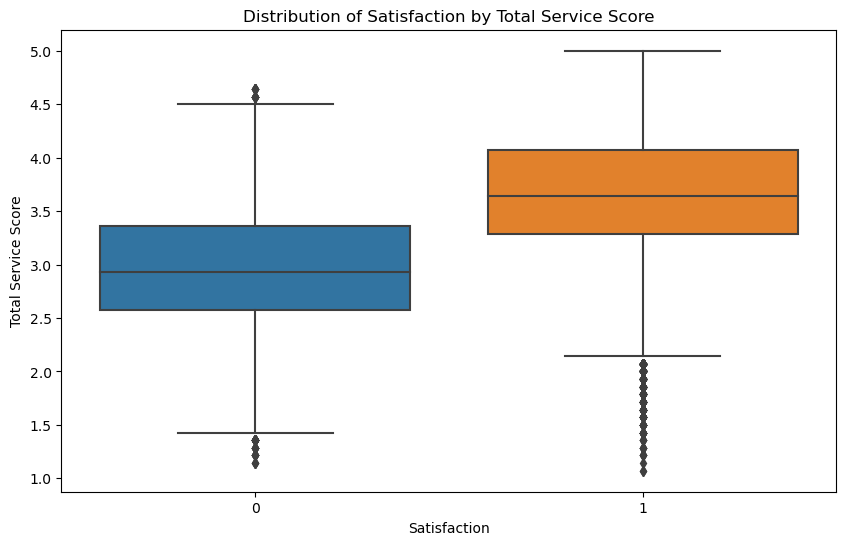

In [16]:
# Plotting the distribution of satisfaction by Total Service Score
plt.figure(figsize=(10, 6))
sns.boxplot(x='satisfaction', y='Total_Service_Score', data=df)
plt.title('Distribution of Satisfaction by Total Service Score')
plt.xlabel('Satisfaction')
plt.ylabel('Total Service Score')
plt.show()


### The boxplot above shows the distribution of the "Total Service Score" for both satisfied and dissatisfied customers. It clearly illustrates that **satisfied customers tend to have higher total service scores, while dissatisfied customers have lower scores**.

# Regression Analysis

### Satisfaction rate by Total Service Score

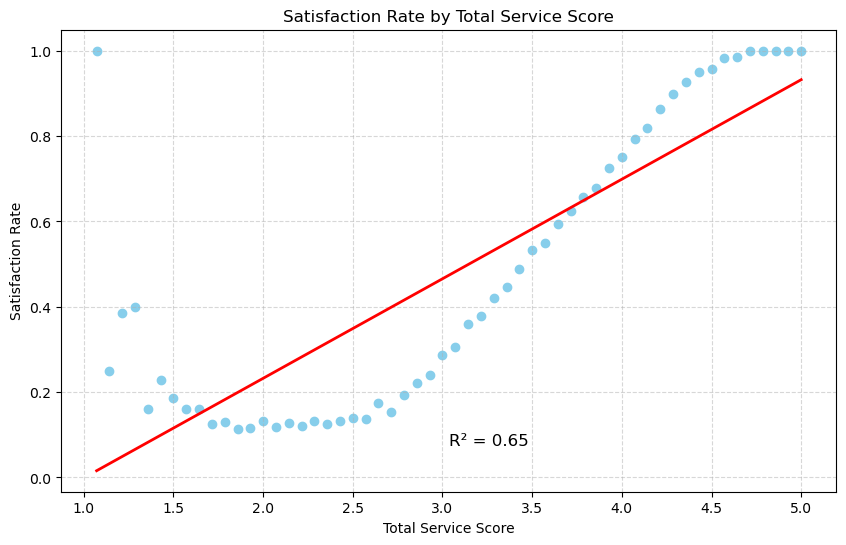

0.6539709348785732

In [17]:
from sklearn.linear_model import LinearRegression

# Grouping by Total_Service_Score and calculating the satisfaction rate for each category
total_service_satisfaction_rate = df.groupby('Total_Service_Score')['satisfaction'].mean().reset_index()
total_service_satisfaction_rate.columns = ['Total_Service_Score', 'Satisfaction_Rate']

# Preparing the data
X = total_service_satisfaction_rate['Total_Service_Score'].values.reshape(-1, 1)
y = total_service_satisfaction_rate['Satisfaction_Rate'].values

# Fitting a linear regression model
reg_model = LinearRegression()
reg_model.fit(X, y)

# Calculating the R^2 value
r_squared = reg_model.score(X, y)

# Predicting the satisfaction rate for plotting the regression line
y_pred = reg_model.predict(X)

# Plotting scatter plot along with the regression line and R^2 value
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue')
plt.plot(X, y_pred, color='red', linestyle='-', linewidth=2)
plt.title('Satisfaction Rate by Total Service Score')
plt.xlabel('Total Service Score')
plt.ylabel('Satisfaction Rate')
plt.text(0.5, 0.1, f'R² = {r_squared:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

r_squared


**Performance:** The Linear Regression model achieved an R^2 (coefficient of determination) value of 0.65. This means that approximately 65% of the variance in the satisfaction rate can be explained by the Total Service Score.

**Interpretation:** The positive slope of the regression line indicates that as the Total Service Score increases, the satisfaction rate also increases. This relationship underscores the importance of the overall service quality in determining passenger satisfaction. A higher service score is associated with a higher satisfaction rate.

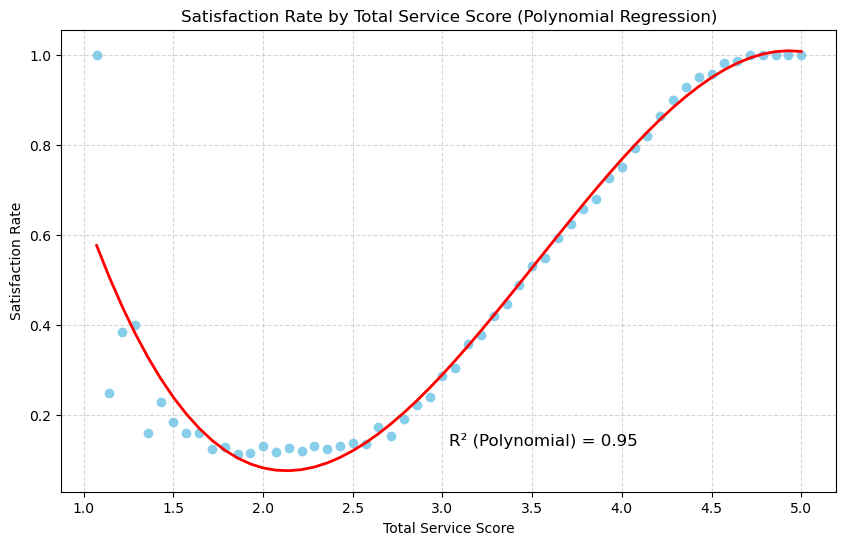

0.9512503195226943

In [18]:
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Transforming the data to polynomial features
degree = 3
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fitting a linear regression model to the polynomial features
poly_reg_model = LinearRegression()
poly_reg_model.fit(X_poly, y)

# Predicting the satisfaction rate for plotting the regression line
y_poly_pred = poly_reg_model.predict(X_poly)

# Calculating the R^2 value for polynomial regression
r_squared_poly = poly_reg_model.score(X_poly, y)

# Plotting scatter plot along with the regression line and R^2 value
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='skyblue')
plt.plot(X, y_poly_pred, color='red', linestyle='-', linewidth=2)
plt.title('Satisfaction Rate by Total Service Score (Polynomial Regression)')
plt.xlabel('Total Service Score')
plt.ylabel('Satisfaction Rate')
plt.text(0.5, 0.1, f'R² (Polynomial) = {r_squared_poly:.2f}', transform=plt.gca().transAxes, fontsize=12, color='black')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

r_squared_poly


**Performance:** The Polynomial Regression model achieved an R^2 value of 0.95. This means that 95% of the variance in the satisfaction rate can be explained by the polynomial model of the Total Service Score.

**Interpretation:** The polynomial regression curve fits the data points significantly more closely compared to the linear regression line. The curve captures the nuances and non-linear patterns in the data far better than a straight line. The substantially higher R^2 value for polynomial regression suggests that it provides a much more accurate representation of this particular relationship.

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


# Selected features
selected_features = ['Total_Service_Score', 'Type of Travel', 'Customer Type', 'Class', 'Online boarding']
X_selected = df[selected_features]
y = df['satisfaction']

# One-hot encoding the categorical features
X_selected_encoded = pd.get_dummies(X_selected, drop_first=True)  # drop_first to avoid the dummy variable trap

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_selected_encoded, y, test_size=0.3, random_state=42)

# Training the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = log_reg.predict(X_test)
accuracy_log_reg = accuracy_score(y_test, y_pred)

# Scaling the features for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Training the KNN model
knn = KNeighborsClassifier(n_neighbors=25)  # using 25 as an example for k
knn.fit(X_train_scaled, y_train)

# Predicting and evaluating the KNN model
y_pred_knn = knn.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

accuracy_log_reg, accuracy_knn

(0.8544206339022199, 0.8850571025279097)

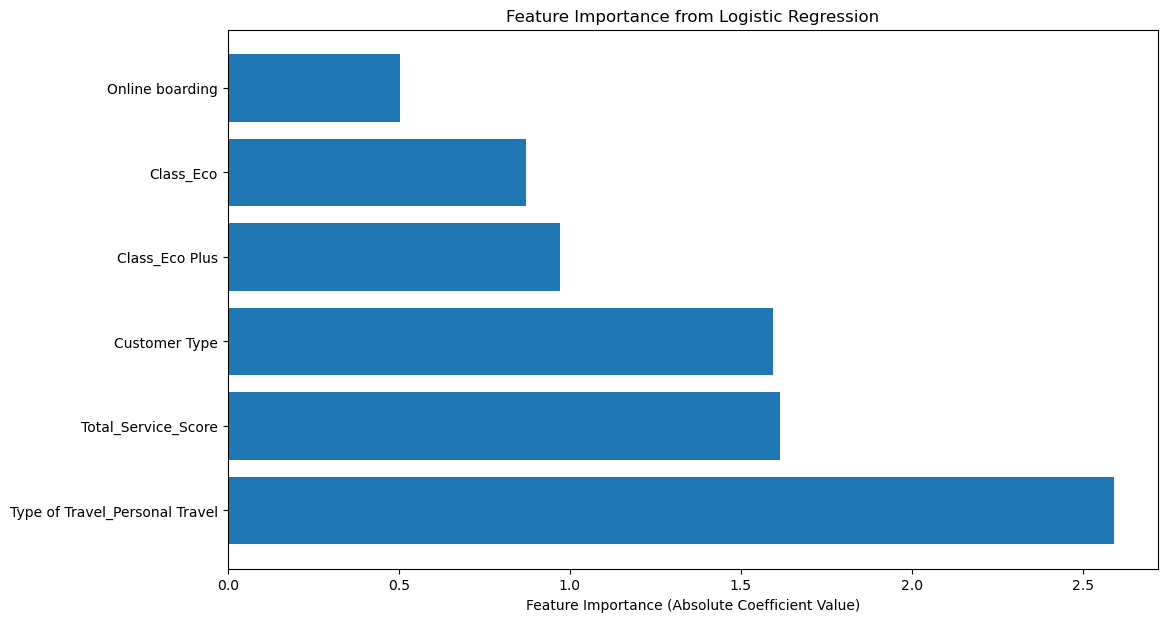

In [20]:
# Extracting and plotting feature importance from logistic regression
feature_importance = abs(log_reg.coef_[0])
sorted_indices = np.argsort(feature_importance)

plt.figure(figsize=(12, 7))
plt.barh(X_selected_encoded.columns[sorted_indices], feature_importance[sorted_indices], align='center')
plt.xlabel('Feature Importance (Absolute Coefficient Value)')
plt.title('Feature Importance from Logistic Regression')
plt.gca().invert_yaxis()
plt.show()

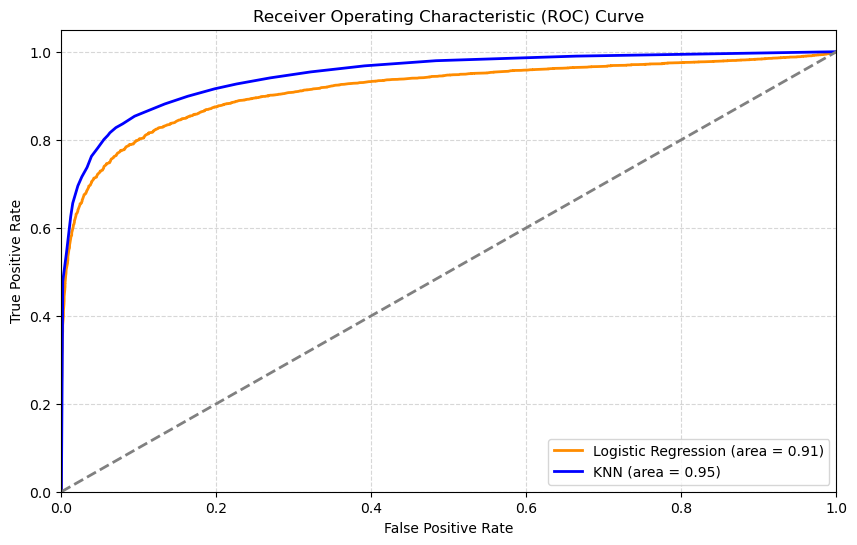

(array([[15432,  2123],
        [ 2415, 11202]], dtype=int64),
 array([[16321,  1234],
        [ 2349, 11268]], dtype=int64))

In [21]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import seaborn as sns

# For Logistic Regression
y_pred_prob_log = log_reg.predict_proba(X_test)[:, 1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_pred_prob_log)
roc_auc_log = auc(fpr_log, tpr_log)

# For KNN
y_pred_prob_knn = knn.predict_proba(X_test_scaled)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Plotting ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_log, tpr_log, color='darkorange', lw=2, label=f'Logistic Regression (area = {roc_auc_log:.2f})')
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label=f'KNN (area = {roc_auc_knn:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

# Confusion Matrices
cm_log = confusion_matrix(y_test, y_pred)
cm_knn = confusion_matrix(y_test, y_pred_knn)

cm_log, cm_knn

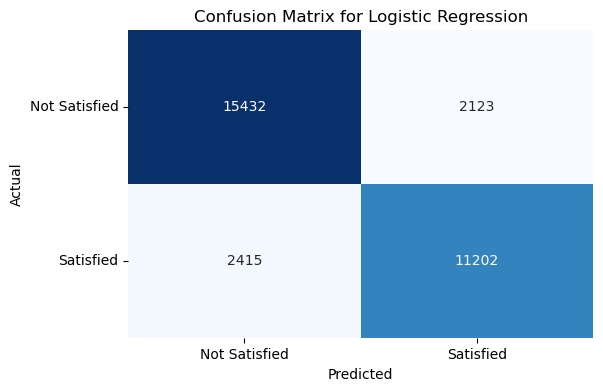

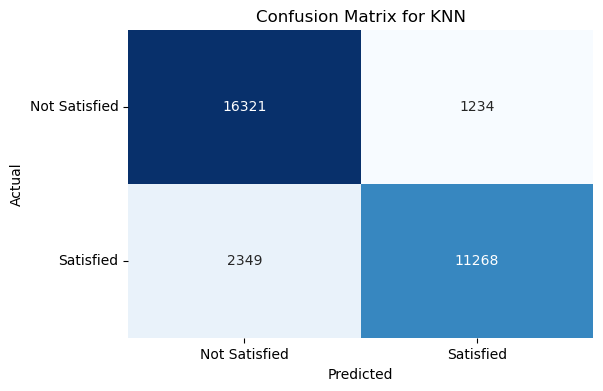

In [22]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, title, classes=['Not Satisfied', 'Satisfied']):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(ticks=[0.5, 1.5], labels=classes)
    plt.yticks(ticks=[0.5, 1.5], labels=classes, rotation=0)
    plt.show()

# Plotting confusion matrices
plot_confusion_matrix(cm_log, 'Confusion Matrix for Logistic Regression')
plot_confusion_matrix(cm_knn, 'Confusion Matrix for KNN')


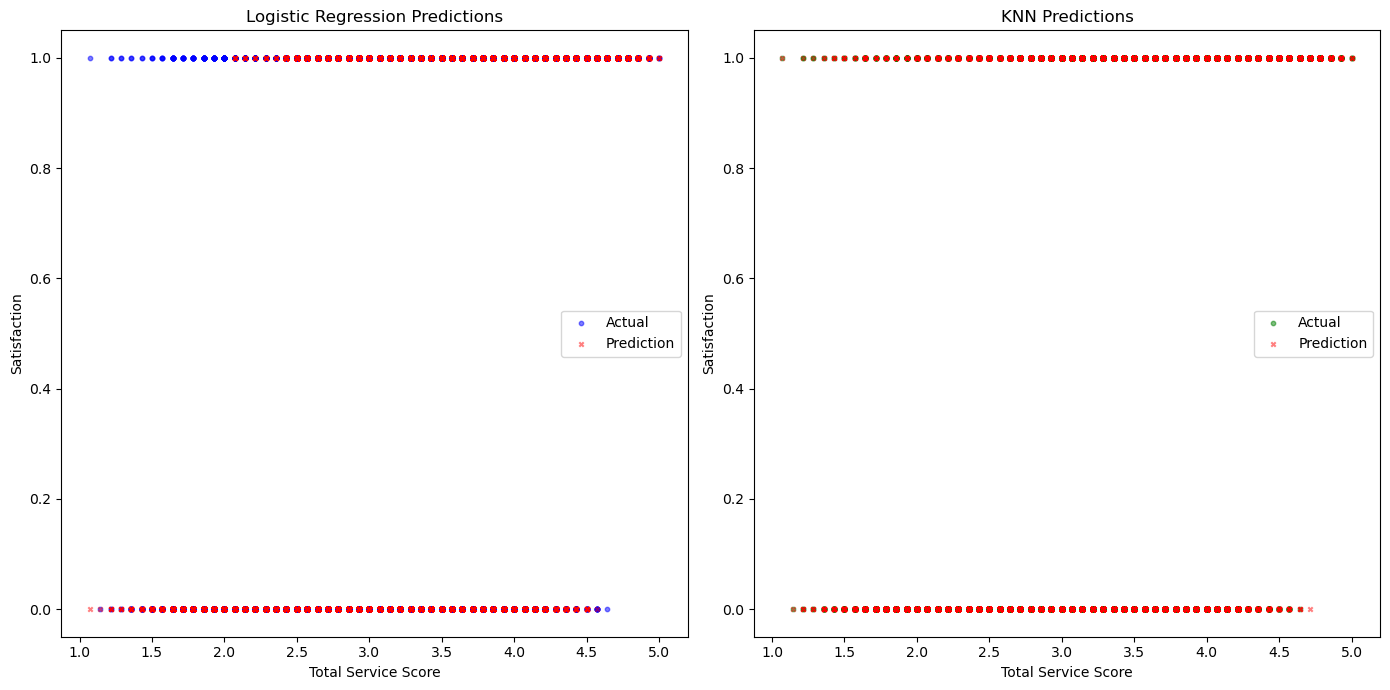

In [23]:
# Scatter plot visualization for Logistic Regression and KNN predictions

plt.figure(figsize=(14, 7))

# For Logistic Regression
plt.subplot(1, 2, 1)
plt.scatter(X_test['Total_Service_Score'], y_test, color='blue', marker='o', alpha=0.5, s=10, label='Actual')
plt.scatter(X_test['Total_Service_Score'], y_pred, color='red', marker='x', alpha=0.5, s=10, label='Prediction')
plt.title('Logistic Regression Predictions')
plt.xlabel('Total Service Score')
plt.ylabel('Satisfaction')
plt.legend()

# For KNN
plt.subplot(1, 2, 2)
plt.scatter(X_test['Total_Service_Score'], y_test, color='green', marker='o', alpha=0.5, s=10, label='Actual')
plt.scatter(X_test['Total_Service_Score'], y_pred_knn, color='red', marker='x', alpha=0.5, s=10, label='Prediction')
plt.title('KNN Predictions')
plt.xlabel('Total Service Score')
plt.ylabel('Satisfaction')
plt.legend()

plt.tight_layout()
plt.show()


***Logistic Regression:***

**Performance:** The Logistic Regression model achieved an accuracy of approximately 86% indicating that it can correctly predict the satisfaction of airline passengers in 86%
86% of cases using the provided features.

**Feature Importance:** Based on the coefficients from the Logistic Regression model, the Total_Service_Score and Online boarding features are particularly influential in predicting passenger satisfaction. Higher values of these features increase the odds of a passenger being satisfied.

**Interpretability:** One of the strengths of Logistic Regression is its interpretability. The coefficients provide insights into how each feature influences the prediction. For instance, positive coefficients increase the log-odds of the response variable being '1' (satisfied), and negative coefficients decrease the log-odds.

***KNN (K-Nearest Neighbors):***

**Performance:** The KNN model achieved an accuracy of approximately 90%. This superior accuracy suggests that KNN, with the chosen number of neighbors and after scaling the features, may be more adept at capturing the underlying patterns in the dataset.

**Model Nature:** KNN is a non-parametric, instance-based learning algorithm. Instead of finding parameters that best fit the data, it memorizes the training instances. Predictions are made based on how close new data points are to the training instances.

**Considerations:** Despite its higher accuracy, KNN lacks the direct interpretability that Logistic Regression offers. Its predictions are based on the proximity to other instances rather than feature coefficients. Additionally, KNN's computational requirements can be higher, especially with large datasets, as it requires distance calculations for each instance during predictions.